In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# This file returned an encoding error, so I imported chardet
# to detect the encoding.

import chardet
with open("datasets/volumen total concesionado por uso consuntivo.csv", "rb") as rawdata:
    result = chardet.detect(rawdata.read(10000))
print(result)
uso_consuntivo = pd.read_csv("datasets/volumen total concesionado por uso consuntivo.csv", encoding="ISO-8859-1")
uso_consuntivo

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


,AÑO,USO_CONSUNTIVO,VOLUMEN_(HECTOMETROS_CUBICOS)
0,2001,Agropecuario,56483
1,2001,Abastecimiento publico,9562
2,2001,Industria,6619
3,2002,Agropecuario,56070
4,2002,Abastecimiento publico,9633
5,2002,Industria,6940
6,2003,Agropecuario,56900
7,2003,Abastecimiento publico,10481
8,2003,Industria,7307
9,2004,Agropecuario,57462


In [4]:
# Use pivot to restructure the dataframe

df = uso_consuntivo
pivot1 = pd.pivot_table(df, index="AÑO", columns="USO_CONSUNTIVO", values="VOLUMEN_(HECTOMETROS_CUBICOS)")
pivot1

USO_CONSUNTIVO,Abastecimiento publico,Agropecuario,Industria
AÑO,,,
2001,9562,56483,6619
2002,9633,56070,6940
2003,10481,56900,7307
2004,10670,57462,7298
2005,10703,58721,7083
2006,10740,59396,7180
2007,11158,60571,7219
2008,11197,61212,7344
2009,11395,61794,7398


In [6]:
# I can also figure out the total volume with a pivot table

pivot2 = pd.pivot_table(df, index="AÑO", columns="USO_CONSUNTIVO", values="VOLUMEN_(HECTOMETROS_CUBICOS)", aggfunc="sum", margins=True, margins_name="hm3 Totales")
pivot2


USO_CONSUNTIVO,Abastecimiento publico,Agropecuario,Industria,hm3 Totales
AÑO,,,,
2001,9562,56483,6619,72664
2002,9633,56070,6940,72643
2003,10481,56900,7307,74688
2004,10670,57462,7298,75430
2005,10703,58721,7083,76507
2006,10740,59396,7180,77316
2007,11158,60571,7219,78948
2008,11197,61212,7344,79753
2009,11395,61794,7398,80587


Text(0, 0.5, 'hm3')

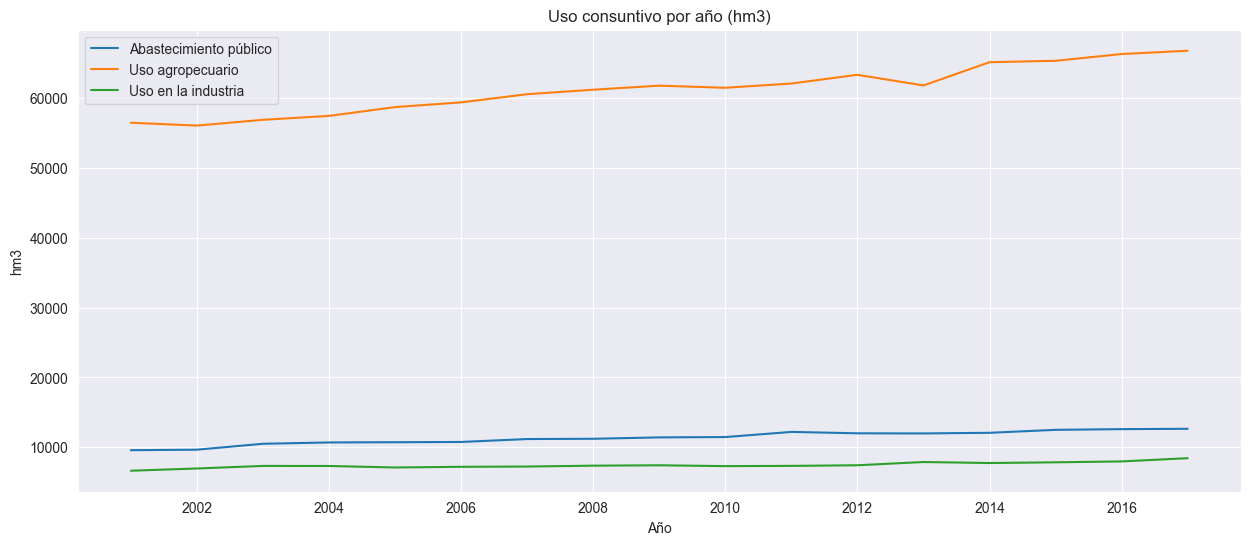

In [7]:
# Set size of figure
plt.figure(figsize=(15,6))

# Plot "uso consuntivo" per year.
plt.title("Uso consuntivo por año (hm3)")

# line chart showing Abastecimiento público
sns.lineplot(data=pivot1["Abastecimiento publico"], label="Abastecimiento público")
# Line chart showing Agropecuario
sns.lineplot(data=pivot1["Agropecuario"], label="Uso agropecuario")
# Line chart showing Industria
sns.lineplot(data=pivot1["Industria"], label="Uso en la industria")

plt.xlabel("Año")
plt.ylabel("hm3")
